## Гришин И.А. ИУ5-21М

In [48]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import pyvista

Данные представляют собой плотное облако точек 4-х деревьев, размеченное на 4 сегмента (дерева) вручную.
X	Y	Z	- координаты в трехмерном пространстве точек
Rf	Gf	Bf	Af	- rgba формат цвета точек, однако в дальнейшем не используется, т.к. покрашен произвольно, но может быть также использован, если съемка велась и с помощью камеры для опеределения реального цвета точек
Original_cloud_index - метка отношения точки к опеределенному дереву	
Intensity -  представляет собой интенсивность обратного луча, т.е. обратная сила лазерного луча, которая зависит от состава поверхности объекта съемки, отражающего лазерный луч
GpsTime	- значение, показывающее время сьемки конкретной точки относительно других точек
Illuminance_(PCV) - (по франц. Portion de Ciel Visible – часть видимого неба) позволяет сохранять в себя степень освещенности объекта, а также его теней. Параметр возможно рассчитать автоматически на постобработке данных с помощью метода на основе искусственного освещения. 
Nx	Ny	Nz - координаты нормалей для каждой точки плотного облака точек (нормали возвращаются как нормализованный вектор, задающийся тремя координатами)

In [49]:
data = pd.read_csv('D:\\Paulava_Monumentse57\\bryansk\\res_4.csv', sep=' ')

In [50]:
data.head()

,X,Y,Z,Rf,Gf,Bf,Af,Original_cloud_index,Intensity,GpsTime,Illuminance_(PCV),Nx,Ny,Nz
0,-15.441977,22.170052,6.5075,0.478431,0.298039,0.188235,1,3.0,7196.0,944.097229,0.305085,0.644430,-0.763402,0.043906
1,-16.273096,25.450899,16.7414,1.000000,0.729412,0.462745,1,2.0,7453.0,773.614319,0.652542,0.562573,-0.327227,-0.759232
2,-14.520386,27.701834,14.2161,1.000000,0.623529,0.396078,1,2.0,3855.0,562.983948,0.483051,0.433393,-0.556270,0.709037
3,-17.835337,24.797560,11.0606,0.784314,0.490196,0.309804,1,0.0,3855.0,2.404279,0.258475,-0.481826,-0.125131,0.867287
4,-14.006311,23.122549,15.3388,1.000000,0.670588,0.427451,1,3.0,5397.0,953.292847,0.432203,0.174502,0.134329,-0.975451


In [51]:
data.shape

(200000, 14)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   X                     200000 non-null  float64
 1   Y                     200000 non-null  float64
 2   Z                     200000 non-null  float64
 3   Rf                    200000 non-null  float64
 4   Gf                    200000 non-null  float64
 5   Bf                    200000 non-null  float64
 6   Af                    200000 non-null  int64  
 7   Original_cloud_index  200000 non-null  float64
 8   Intensity             200000 non-null  float64
 9   GpsTime               200000 non-null  float64
 10  Illuminance_(PCV)     200000 non-null  float64
 11  Nx                    200000 non-null  float64
 12  Ny                    200000 non-null  float64
 13  Nz                    200000 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 21.4 MB


In [7]:
data.isnull().sum()

X                       0
Y                       0
Z                       0
Rf                      0
Gf                      0
Bf                      0
Af                      0
Original_cloud_index    0
Intensity               0
GpsTime                 0
Illuminance_(PCV)       0
Nx                      0
Ny                      0
Nz                      0
dtype: int64

In [53]:
data['Original_cloud_index'].value_counts()

3.0    93295
2.0    49205
1.0    34538
0.0    22962
Name: Original_cloud_index, dtype: int64

In [54]:
data = data.drop(columns=['Rf', 'Gf', 'Bf', 'Af'])

In [55]:
data_np = np.asarray(data)
points = data_np[:,0:3]
points

array([[-15.44197655,  22.17005157,   6.50750017],
       [-16.27309608,  25.45089912,  16.74139977],
       [-14.52038574,  27.70183372,  14.21609974],
       ...,
       [-17.26198387,  25.43191338,   3.29699993],
       [-13.84191132,  25.37606049,  17.27659988],
       [-20.23301125,  23.28394127,   0.6243    ]])

In [56]:
import random
p1 = pyvista.Plotter(window_size=[1000, 1000])
for i in np.unique(data['Original_cloud_index']):
    idx_layer=np.where(data['Original_cloud_index']==i)
    i_data = points[idx_layer]
    pdata = pyvista.PolyData(i_data)
    pdata['orig_sphere'] = np.arange(i_data.shape[0])
    if i == -1:
        r = lambda: random.randint(0,1)
    else:
        r = lambda: random.randint(0,255)
    p1.add_mesh(pdata, color=[r(),r(),r()])
p1.show()

Widget(value="<iframe src='http://localhost:55531/index.html?ui=P_0x1dd6117a548_2&reconnect=auto' style='width…

Визуализация позволяет оценить загруженное облако точек, а также увидеть 4 сегмента, окраженные в разные цвета.

<AxesSubplot:>

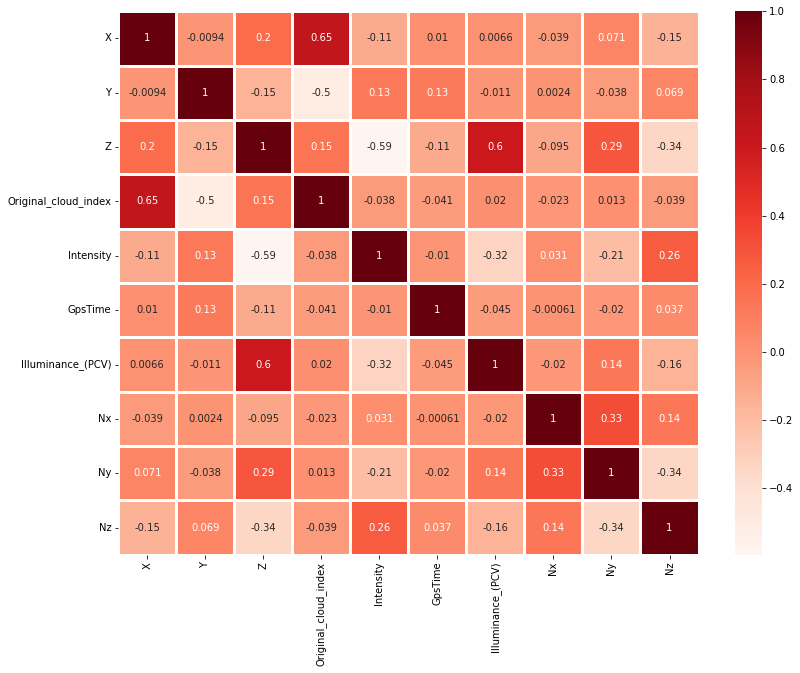

In [58]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "Reds", annot=True, linewidth=3)

Из матрицы корреляции видно, что наиболее сильно коррелируют показатели координат X и Y c Original_cloud_index, что верно, т.к. деревья расположены вертикально в пространстве. Параметр Intensity коррелирует с координатой Z, поскольку замечено, что точки ствола дерева чаще имеют высокую отражательную способность, а значит и высокое значение интенсивности, а т.к. ствол расположен в нижней части - существует корреляция. Illuminance_(PCV) коррелирует с координатой Z по тем причинам, что Illuminance определяет освещенность объекта, точка искусственного освещения расположена над объектом.

c:\Users\Администратор\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning:



The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.




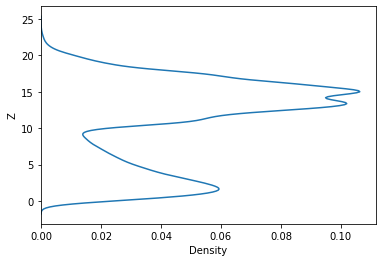

In [59]:
sns.kdeplot(data['Z'], vertical=True)
plt.show()

Из графика видно, что плотность точек имеет большие значения на уровне груди (1,3 м) (т.к. съемка велась с помощью портативного лазерного сканера человеком) и на высоте 15 м, где начинается крона дерева, поскольку рассматриваемые деревья - сосны.

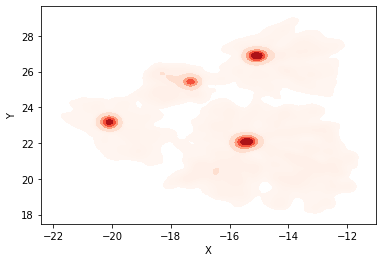

In [60]:
sns.kdeplot(x=data.X, y=data.Y, cmap="Reds", shade=True, bw_adjust=.5)
plt.show()

График позволяет определить координаты и местоположения стволов деревьев.

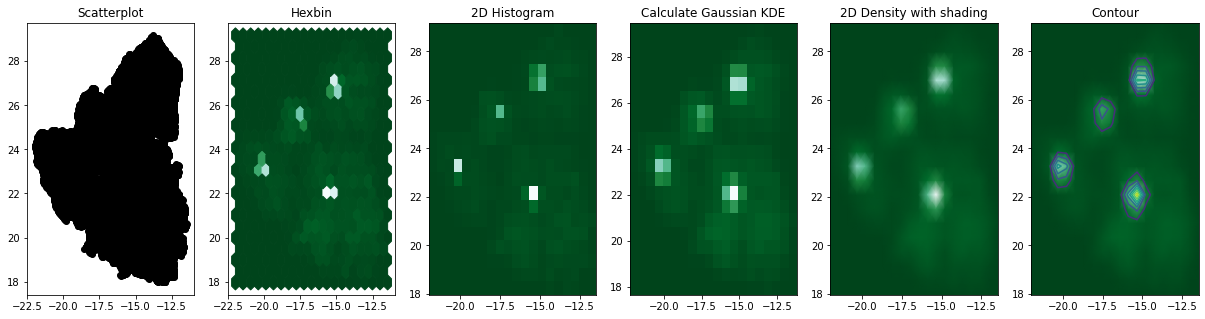

In [61]:
from scipy.stats import kde
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything starts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(data.X, data.Y, 'ko')
# As you can see there is a lot of overlapping here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(data.X, data.Y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(data.X, data.Y, bins=nbins, cmap=plt.cm.BuGn_r)

XY = pd.DataFrame(data.X)
XY['Y'] = data.Y

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(XY.T)
xi, yi = np.mgrid[data.X.min():data.X.max():nbins*1j, data.Y.min():data.Y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )

График также позволяет определить координаты и местоположения стволов деревьев. А также дает представление структуре участка и количественном наполнении, что, например, даст возможность разделить облако точек вертикальными областями.

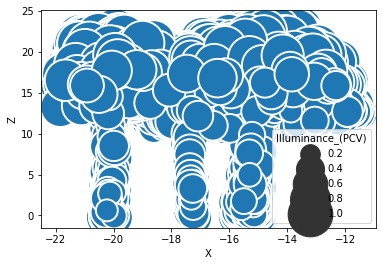

In [26]:
sns.scatterplot(data=data, x="X", y="Z", size="Illuminance_(PCV)", legend=True, sizes=(1, 2000))
plt.show()

График показывает распеределения значений освещенности по краям деревьем, но имеет низкую информативаность.

<AxesSubplot:xlabel='Original_cloud_index', ylabel='Intensity'>

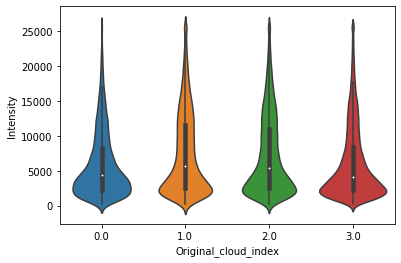

In [21]:
sns.violinplot(x=data["Original_cloud_index"], y=data["Intensity"])

График показывает средние значения интенсивности у каждого дерева и распеределения значений интенсивности по каждому дереву.

Исходя из проведённого анализа, получаем, что точки ствола дерева чаще имеют высокую отражательную способность, а значит и высокое значение интенсивности, карта плотности позволяет опеределить координаты и местоположения стволов деревьев, а также получить информацию о его количественном наполнении, которое, как известно может использоваться для определения количества кластеров в некоторых методах сегментации. Карта корреляции показывает, что значение Original_cloud_index (label отношения точки к опеределенному дереву) имеет слабую корреляцию с основной массой признаков, что затрудняет поиск и кластеризацию деревьев без предварительной обработки облака точек. Также обнаружено, что основная часть точек имеет интенсивность до 5000 единиц.